In [ ]:
pip install networkx

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.manifold import Isomap

## Getting Data

In [2]:
X = scipy.io.loadmat('isomap.mat')

In [3]:
Images = X['images'].T

In [4]:
Images.shape

(698, 4096)

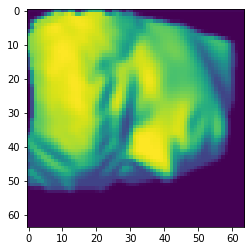

In [5]:
plt.imshow(Images[423].reshape(64,64))

# Q.1 Euclidean Distance

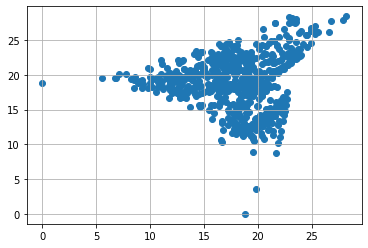

In [6]:
eu_dist = euclidean_distances(Images)
df = pd.DataFrame(eu_dist)
plt.scatter(df[0],df[1])
plt.grid()

In [7]:
eu_dist

array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

In [8]:
eu = pd.DataFrame(eu_dist)
eu.head()

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,697
0,0.000000,18.830950,6.743240,19.291002,17.117560,18.367644,21.426292,18.746393,22.151970,15.610434,...,15.293705,25.352856,14.265591,20.317401,22.472842,14.417110,17.559731,21.511267,22.792893,18.036180
1,18.830950,0.000000,19.553072,16.924710,19.617793,15.198507,20.054589,17.111921,11.889321,17.645229,...,19.679758,26.960376,17.012472,14.059907,21.202065,22.516987,23.266726,15.074356,21.633874,20.973997
2,6.743240,19.553072,0.000000,19.679794,17.931995,18.408861,21.774991,18.556554,23.107929,16.811867,...,17.703405,25.179532,14.598735,20.322023,22.780399,12.939302,16.941719,22.821401,23.240408,18.684180
3,19.291002,16.924710,19.679794,0.000000,19.244166,15.100051,5.726981,14.149085,19.922656,18.110776,...,20.734193,20.328324,18.613615,20.646978,9.470880,22.688295,21.838005,19.993928,16.270597,20.431342
4,17.117560,19.617793,17.931995,19.244166,0.000000,18.892824,20.974200,21.224602,18.906362,12.719247,...,13.463226,25.553818,19.034806,21.096973,22.062440,20.462468,16.842925,17.186085,22.395453,14.613828


In [43]:
MIN = 13 # we could set it to 0 but it does not make any sense 
MAX = eu.max().max()
# Since EVERY Node should have atleast 100 SO we found out in first try that for a thresh< 13.5, first image has 95 
# close images so the value has to be bigger than atleast this value and reaches a max of given MAX

In [44]:
flag = 0
for i in range(eu.shape[0]):
    if (eu[i]<13.5).sum()

94

In [8]:
graph = nx.from_numpy_matrix(eu_dist)

C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


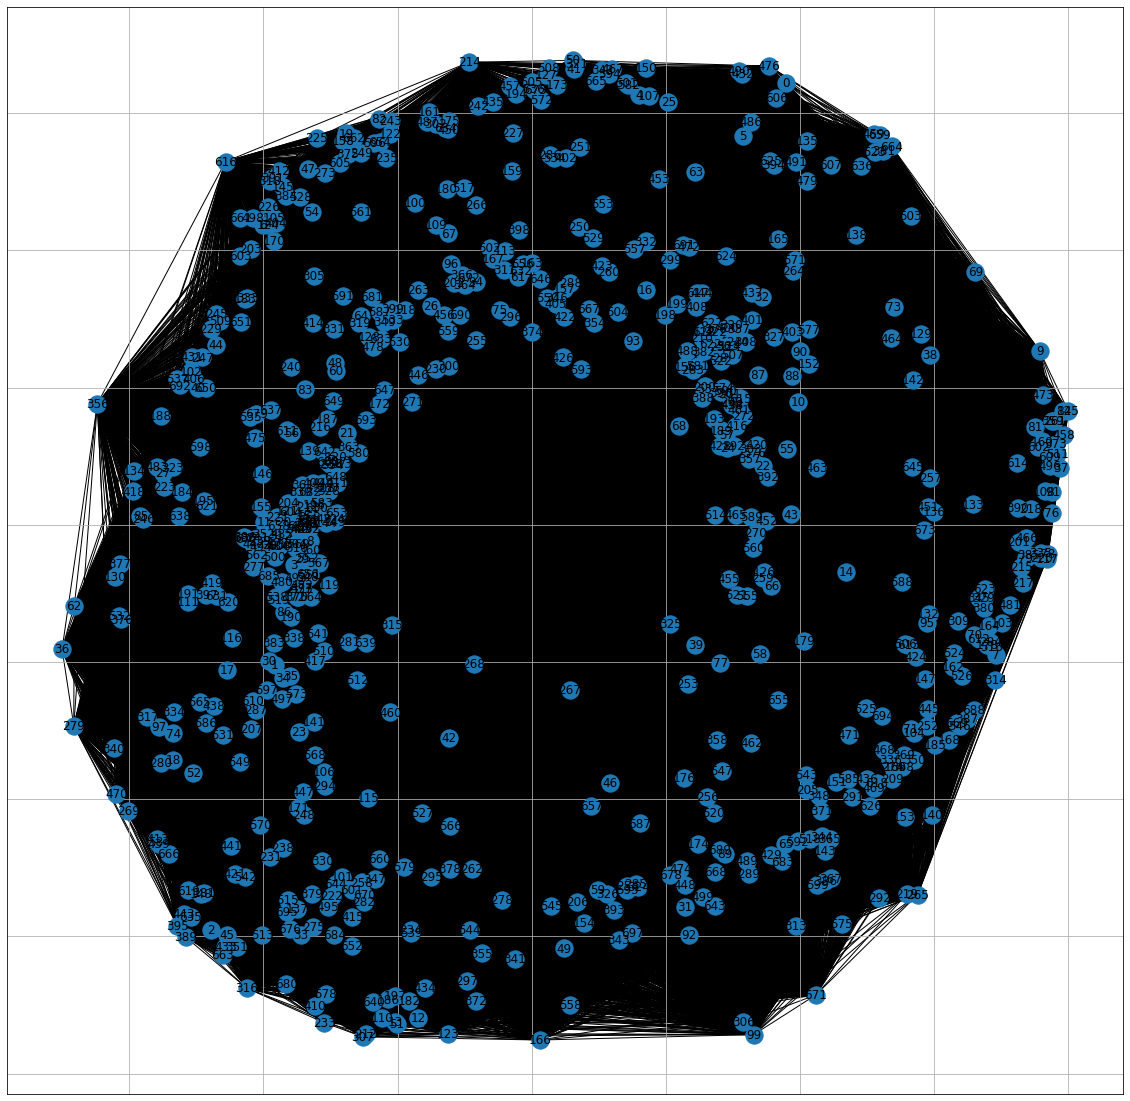

In [9]:
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(graph)
plt.grid()

# Q.2 Implement Isomap

In [10]:
embedding = Isomap(n_components=2,).fit(Images)

In [20]:
embedding.dist_matrix_

array([[  0.        ,  65.47429228,   6.74323967, ...,  95.97638332,
         68.22343147,  33.82524508],
       [ 65.47429228,   0.        ,  64.45341772, ...,  32.17554891,
         37.16263547,  69.97803737],
       [  6.74323967,  64.45341772,   0.        , ...,  89.23314365,
         63.80875147,  27.08200542],
       ...,
       [ 95.97638332,  32.17554891,  89.23314365, ...,   0.        ,
         68.26069861, 102.14466658],
       [ 68.22343147,  37.16263547,  63.80875147, ...,  68.26069861,
          0.        ,  52.98475238],
       [ 33.82524508,  69.97803737,  27.08200542, ..., 102.14466658,
         52.98475238,   0.        ]])

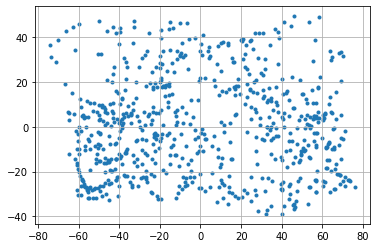

In [43]:
plt.scatter(embedding.embedding_[0:,:1],embedding.embedding_[0:,1:],marker='.')
plt.grid()

In [11]:
dist_2d = euclidean_distances(embedding.embedding_)

In [12]:
df = pd.DataFrame(dist_2d)

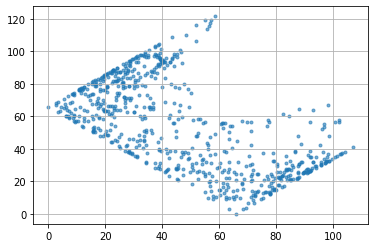

In [13]:
plt.scatter(df[0],df[1],marker='.',alpha=0.6)
plt.grid()

C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


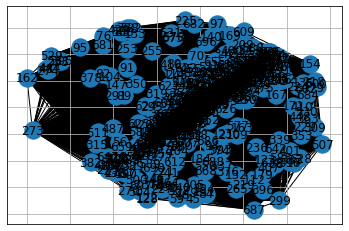

In [14]:
graph = nx.from_numpy_array(dist_2d)
nx.draw_networkx(graph)
plt.grid()

# Q.3 Manhattan Distances

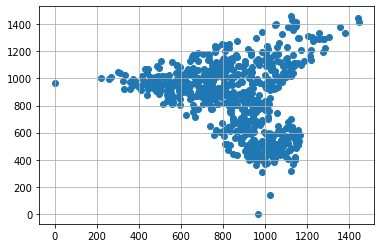

In [15]:
man_dist = manhattan_distances(Images)
df = pd.DataFrame(man_dist)
plt.scatter(df[0],df[1])
plt.grid()

In [16]:
graph = nx.from_numpy_matrix(man_dist)

C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


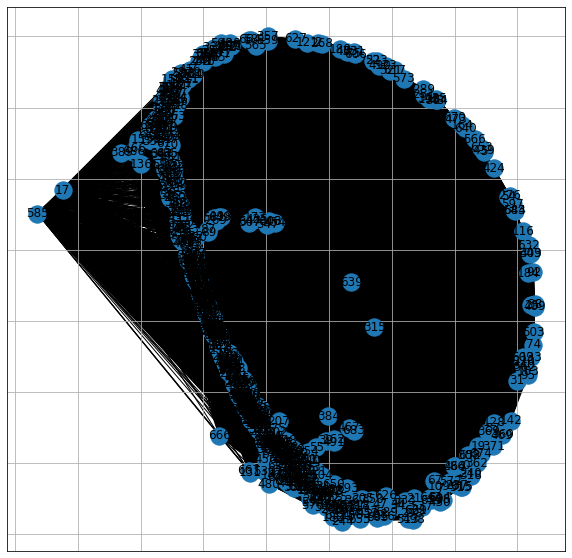

In [17]:
fig = plt.figure(figsize=(10,10))
nx.draw_networkx(graph)
plt.grid()